In [1]:
import os
import pandas as pd 
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [3]:
data = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding="ISO-8859-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
message = data['v2']
target = data['v1']

data = pd.DataFrame({'text':message,'target':target})
data

,text,target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


In [7]:
data['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

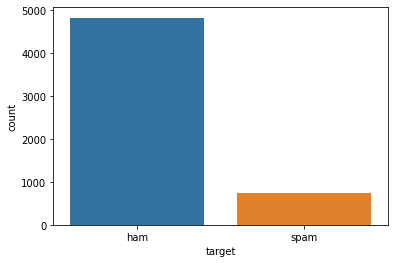

In [8]:
sns.countplot(x=data['target'])

In [9]:
def process(sentence):
    text = re.sub('[^\w]+',' ',sentence).split()
    words = [x.lower() for x in text if x not in stopwords.words('english')]
    
    lemma = WordNetLemmatizer()
    word = [lemma.lemmatize(word,'v') for word in words ]
    word = ' '.join(word)
    return word

In [10]:
data['text'] = data['text'].apply(process)

In [11]:
data.head()

,text,target
0,go jurong point crazy available bugis n great ...,ham
1,ok lar joke wif u oni,ham
2,free entry 2 wkly comp win fa cup final tkts 2...,spam
3,u dun say early hor u c already say,ham
4,nah i think go usf live around though,ham


In [12]:
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['text'])
X.shape

(5572, 5000)

In [13]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
y = pd.get_dummies(data['target'])
y = y.iloc[:,1]
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: spam, Length: 5572, dtype: uint8

In [15]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=.2,random_state=42)
print(f"Train Shape : {X_train.shape} {y_train.shape}")
print(f"Test Shape : {X_test.shape} {y_test.shape}")

Train Shape : (4457, 5000) (4457,)
Test Shape : (1115, 5000) (1115,)


In [16]:
Mnb = MultinomialNB()
Mnb.fit(X_train,y_train)

MultinomialNB()

In [17]:
y_pred = Mnb.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=uint8)

<AxesSubplot:>

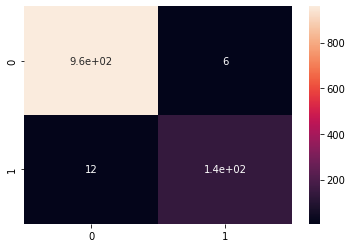

In [18]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [19]:
print(f'Accuarcy is : {accuracy_score(y_test,y_pred)}')

Accuarcy is : 0.9838565022421525


In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115

